In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
dataset = pd.read_csv(r'../dataset/fake_bills.csv')
dataset.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [46]:
dataset.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [47]:
dataset = dataset.fillna(dataset.mean(numeric_only=True))

In [50]:
dataset['is_genuine'] = dataset['is_genuine'].astype(int)

In [51]:
dataset.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
x = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, p=2)
    knn.fit(x_train,y_train)
    print(i, knn.score(x_train, y_train)*100, knn.score(x_test, y_test)*100)

1 100.0 98.66666666666667
2 99.28888888888889 98.93333333333332
3 99.2 99.46666666666667
4 99.11111111111111 99.73333333333333
5 99.11111111111111 98.93333333333332
6 99.02222222222223 98.93333333333332
7 99.02222222222223 98.93333333333332
8 99.02222222222223 99.2
9 99.02222222222223 99.2
10 99.02222222222223 99.2
11 98.93333333333332 99.2
12 98.93333333333332 99.2
13 98.84444444444445 99.2
14 98.93333333333332 99.2
15 98.84444444444445 99.2
16 98.84444444444445 99.2
17 98.93333333333332 99.2
18 98.93333333333332 99.2
19 98.93333333333332 99.2


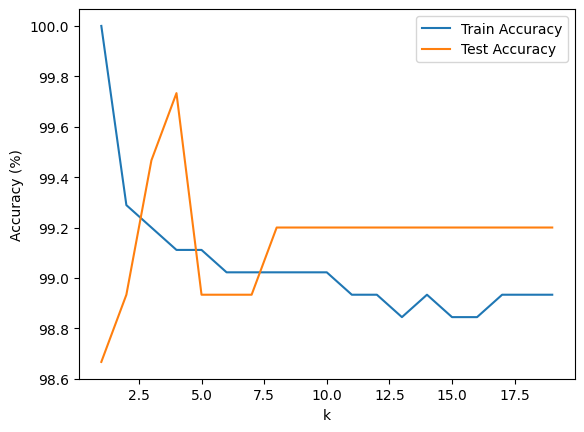

In [63]:
train_scores = []
test_scores = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, p=2)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train)*100)
    test_scores.append(knn.score(x_test, y_test)*100)

plt.plot(range(1, 20), train_scores, label='Train Accuracy')
plt.plot(range(1, 20), test_scores, label='Test Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()


In [58]:
knn1 = KNeighborsClassifier(n_neighbors=3, p=2)
knn1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
knn1.score(x_test, y_test)*100

99.46666666666667

In [60]:
from mlxtend.plotting import plot_decision_regions

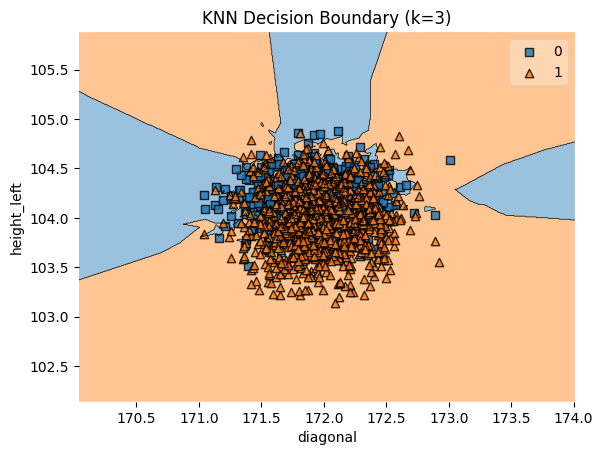

In [64]:
x_vis = dataset.iloc[:, [1, 2]].to_numpy()  # pick 2 columns only
y_vis = dataset.iloc[:, 0].to_numpy()

knn1.fit(x_vis, y_vis)
plot_decision_regions(x_vis, y_vis, clf=knn1)
plt.xlabel(dataset.columns[1])
plt.ylabel(dataset.columns[2])
plt.title("KNN Decision Boundary (k=3)")
plt.show()
